Importing the necessary libraries 

In [1]:
import pandas as pd                 #for data manipulation using dataframe
import numpy as np                  #for data statistical analysis
import matplotlib.pyplot as plt     #for data visualizaton
import seaborn as sns               #for statistical data visualization
import warnings
warnings.simplefilter('ignore')

Loading the dataset to be used

In [2]:
data=pd.read_excel('chipago.xlsx')
data.head()

,Sample ID,State,Study site,Age,Date of sampling,Sex,Married,Pregnant,Domicil,HIV status,Malaria status,CHIKV,DENV,ZIKV,FLAVI,CHIKV/DENV,CHIKV/ZIKV
0,AB01,ABIA,ABA/TEACHING HOSPITAL,34,2021-02-22,F,YES,NO,URBAN,NEG,NEG,NEG,NEG,NEG,NEG,NEG,NEG
1,AB02,ABIA,ABA/TEACHING HOSPITAL,27,2021-02-22,F,YES,NO,URBAN,NEG,NEG,NEG,NEG,NEG,NEG,NEG,NEG
2,AB03,ABIA,ABA/TEACHING HOSPITAL,45,2021-02-22,M,YES,NO,URBAN,NEG,POS,POS,NEG,NEG,NEG,NEG,NEG
3,AB04,ABIA,ABA/TEACHING HOSPITAL,65,2021-02-22,M,YES,NO,URBAN,NEG,NEG,NEG,POS,NEG,NEG,NEG,NEG
4,AB05,ABIA,ABA/TEACHING HOSPITAL,34,2021-02-22,M,YES,NO,URBAN,NEG,NEG,NEG,POS,NEG,NEG,NEG,NEG


Understanding the dataset is important, so i cheacked for the features of the dataset

In [3]:
#Checking for the shape of the data
a= data.shape
print('Data contain {} rows and {} columns'.format(a[0], a[1]))

Data contain 871 rows and 17 columns


In [4]:
#This method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 871 entries, 0 to 870
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Sample ID         453 non-null    object        
 1   State             871 non-null    object        
 2   Study site        871 non-null    object        
 3   Age               871 non-null    int64         
 4   Date of sampling  871 non-null    datetime64[ns]
 5   Sex               871 non-null    object        
 6   Married           871 non-null    object        
 7   Pregnant          871 non-null    object        
 8   Domicil           871 non-null    object        
 9   HIV status        871 non-null    object        
 10  Malaria status    871 non-null    object        
 11   CHIKV            871 non-null    object        
 12  DENV              871 non-null    object        
 13  ZIKV              871 non-null    object        
 14  FLAVI             871 non-

In [5]:
#This method gives the descriptive statistics 
data.describe(include=object)

,Sample ID,State,Study site,Sex,Married,Pregnant,Domicil,HIV status,Malaria status,CHIKV,DENV,ZIKV,FLAVI,CHIKV/DENV,CHIKV/ZIKV
count,453,871,871,871,871,871,871,871,871,871,871,871,871,870,870
unique,453,27,7,4,8,7,3,2,2,2,2,2,4,2,3
top,AB01,KAD,FMC KEFFI,F,YES,No,URBAN,NEG,NEG,POS,NEG,NEG,NEG,NEG,NEG
freq,1,327,238,606,351,469,507,590,629,565,482,704,819,596,678


Is there a missing data and how many are they? let's find out

In [6]:
data.isnull().sum()

Sample ID           418
State                 0
Study site            0
Age                   0
Date of sampling      0
Sex                   0
Married               0
Pregnant              0
Domicil               0
HIV status            0
Malaria status        0
 CHIKV                0
DENV                  0
ZIKV                  0
FLAVI                 0
CHIKV/DENV            1
CHIKV/ZIKV            1
dtype: int64

Some columns in the data are not needed for this project so i will drop them. And some input will be replace while some will be renamed for effective visualization 

In [7]:
#dropping some columns
data=data.drop(columns=['Sample ID','CHIKV/DENV', 'CHIKV/ZIKV', 'Study site', 'Date of sampling'])

#dropping this row 
data=data.drop(497)

#renaming some columns
data.rename(columns={' CHIKV': 'CHIKV'}, inplace=True)

#replacing some rows 
data['FLAVI'] = data['FLAVI'].str.replace(' NEG','NEG')
data['Sex']= data['Sex'].str.replace('f','F')
data['Sex']= data['Sex'].str.replace('m','M')
data['Married']= data['Married'].str.replace('Yes','YES')
data['Married']= data['Married'].str.replace('yes','YES')
data['Married']= data['Married'].str.replace('Yes','YES')
data['Married']= data['Married'].str.replace('YES','YES')
data['Married']= data['Married'].str.replace('No','NO')
data['Married']= data['Married'].str.replace('no','NO')
data['Married']= data['Married'].str.replace('-','NO')
data['Married']= data['Married'].str.replace('NO Married','NO')
data['Pregnant']= data['Pregnant'].str.replace('No','NO')
data['Pregnant']= data['Pregnant'].str.replace('no','NO')
data['Pregnant']= data['Pregnant'].str.replace(' No','NO')
data['Pregnant']= data['Pregnant'].str.replace(' NO','NO')
data['Pregnant']= data['Pregnant'].str.replace('N+H757:H777','NO')
data['Pregnant']= data['Pregnant'].str.replace('Yes','YES')

Data has been cleaned

In [8]:
data.head()

,State,Age,Sex,Married,Pregnant,Domicil,HIV status,Malaria status,CHIKV,DENV,ZIKV,FLAVI
0,ABIA,34,F,YES,NO,URBAN,NEG,NEG,NEG,NEG,NEG,NEG
1,ABIA,27,F,YES,NO,URBAN,NEG,NEG,NEG,NEG,NEG,NEG
2,ABIA,45,M,YES,NO,URBAN,NEG,POS,POS,NEG,NEG,NEG
3,ABIA,65,M,YES,NO,URBAN,NEG,NEG,NEG,POS,NEG,NEG
4,ABIA,34,M,YES,NO,URBAN,NEG,NEG,NEG,POS,NEG,NEG


Correlation between HIV and other feature

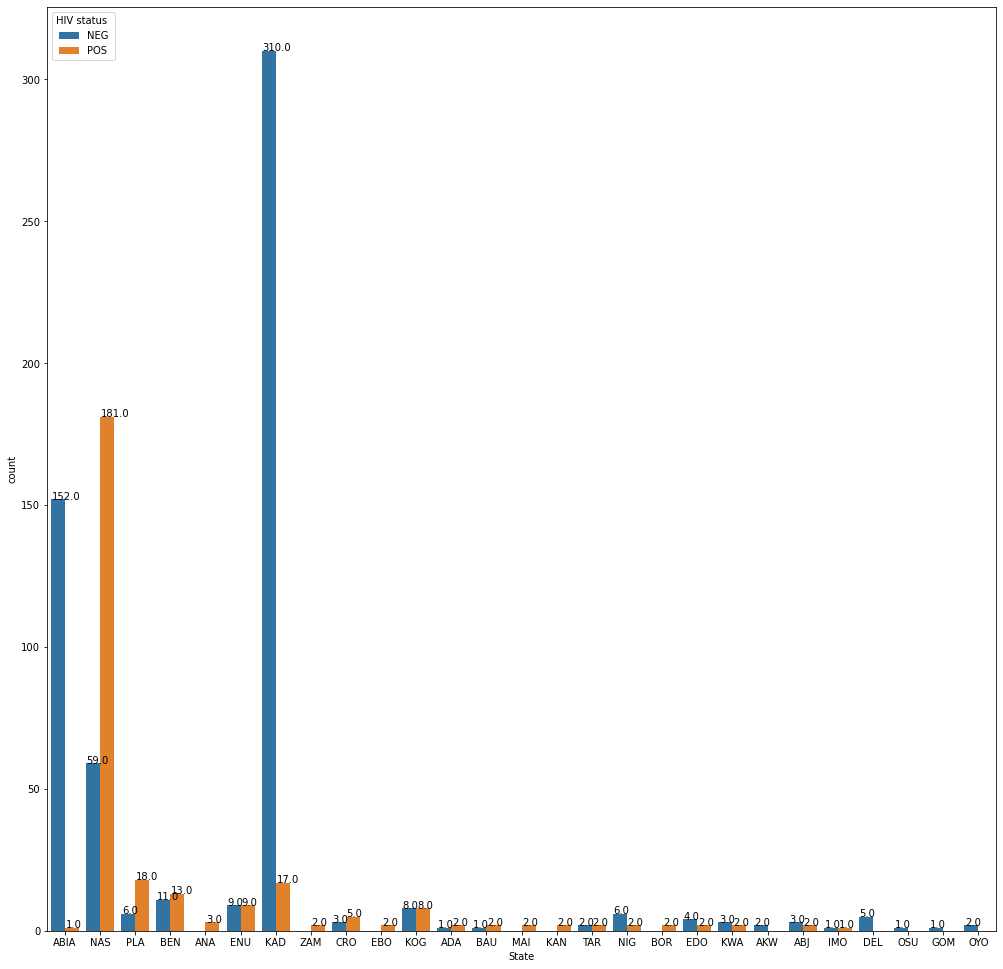

In [9]:
#Correlation between HIV and the state
plt.figure(figsize=(17,17))
a=sns.countplot(x='State',hue=data.iloc[:,6],data=data)
for p in a.patches:
    a.annotate('{:}'.format(p.get_height()),
               (p.get_x()+0.02, p.get_height()+0.01))
plt.show()

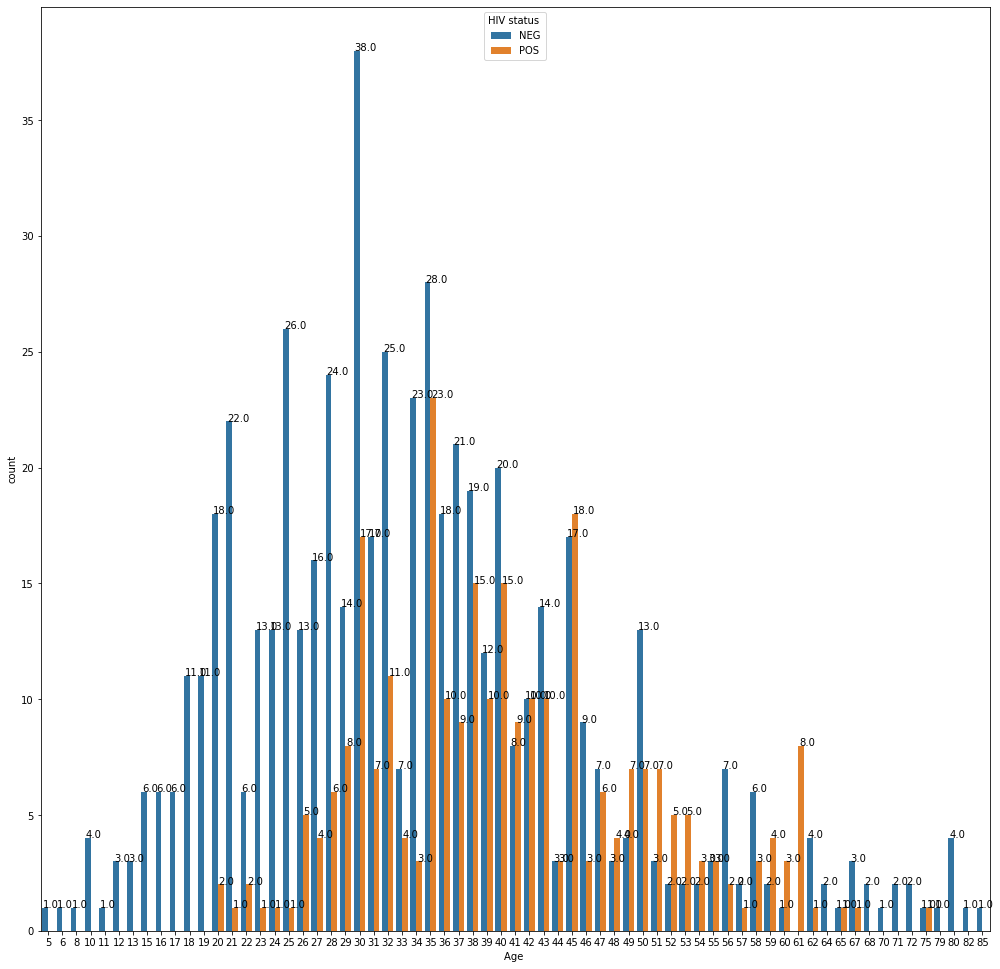

In [10]:
#Correlation between HIV and age
plt.figure(figsize=(17,17))
a=sns.countplot(x=data.iloc[:,1],hue=data.iloc[:,6],data=data)
for p in a.patches:
    a.annotate('{:}'.format(p.get_height()),
               (p.get_x()+0.05, p.get_height()+0.01))
plt.show()

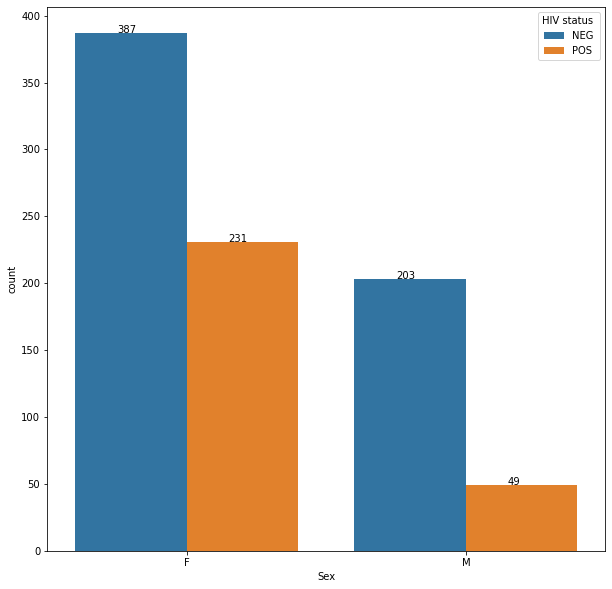

In [11]:
#Correlation between HIV and the gender
plt.figure(figsize=(10,10))
a=sns.countplot(x='Sex',hue=data.iloc[:,6],data=data)
for p in a.patches:
    a.annotate('{:}'.format(p.get_height()),
               (p.get_x()+0.15, p.get_height()+0.01))
plt.show()

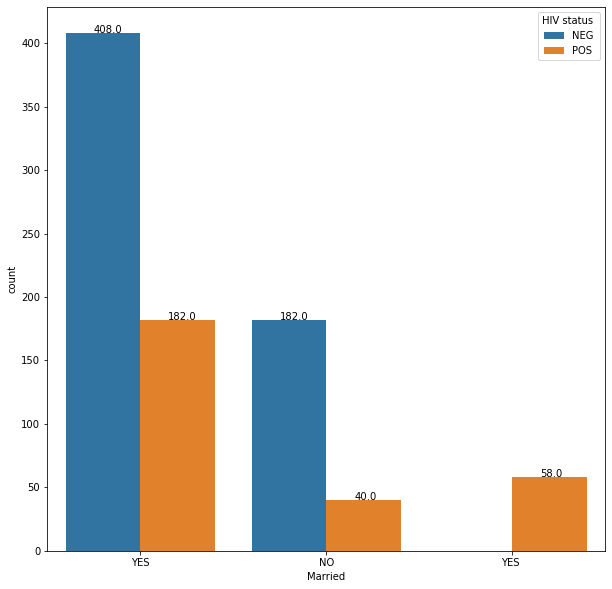

In [12]:
#Correlation between HIV and Marriage 
plt.figure(figsize=(10,10))
a=sns.countplot(x='Married',hue=data.iloc[:,6],data=data)
for p in a.patches:
    a.annotate('{:}'.format(p.get_height()),
               (p.get_x()+0.15, p.get_height()+0.1))
plt.show() 

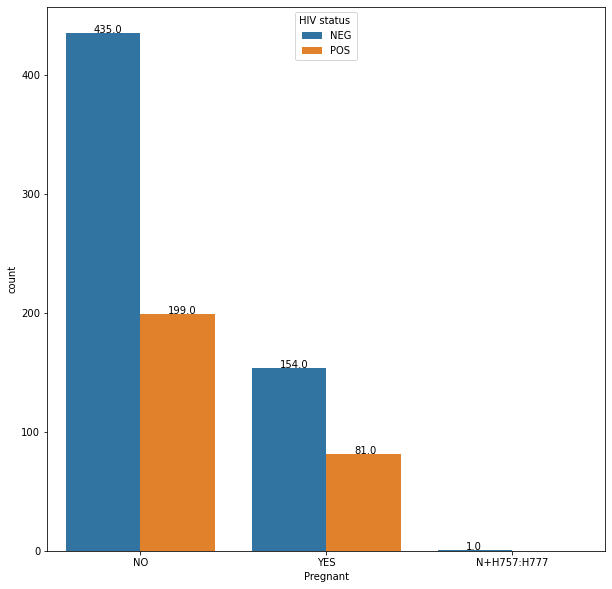

In [13]:
#Correlation between HIV and the Pregnant ones
plt.figure(figsize=(10,10))
a=sns.countplot(x='Pregnant',hue=data.iloc[:,6],data=data)
for p in a.patches:
    a.annotate('{:}'.format(p.get_height()),
               (p.get_x()+0.15, p.get_height()+0.01))
plt.show()

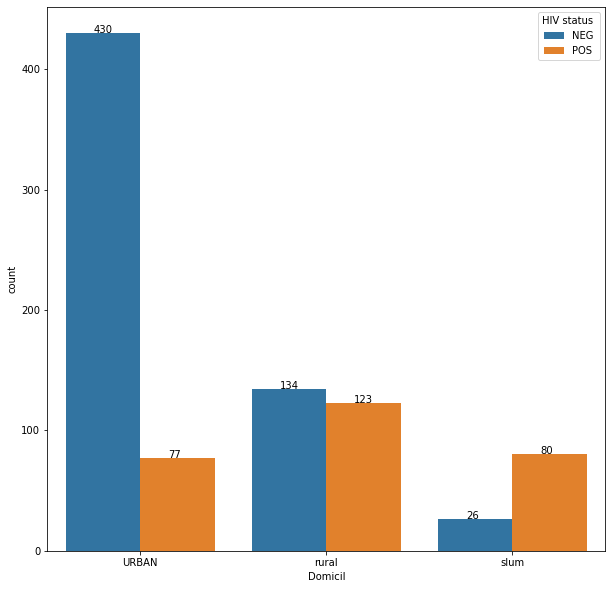

In [14]:
#Correlation between HIV and the Domicil 
plt.figure(figsize=(10,10))
a=sns.countplot(x='Domicil',hue=data.iloc[:,6],data=data)
for p in a.patches:
    a.annotate('{:}'.format(p.get_height()),
               (p.get_x()+0.15, p.get_height()+0.1))
plt.show()

* Few number of people are having HIV
* Those infected with this virus range from age 20 to 60 and mostly adults
* Almost all the states has this virus 
* Most of the people tested are married
* Female are most test
* Most of the female are tested postive and few are pregant
* All the Domicil are infected with this virus with the slum and rural areas having 
  the most population

# Correlation between Malaria status and other feature

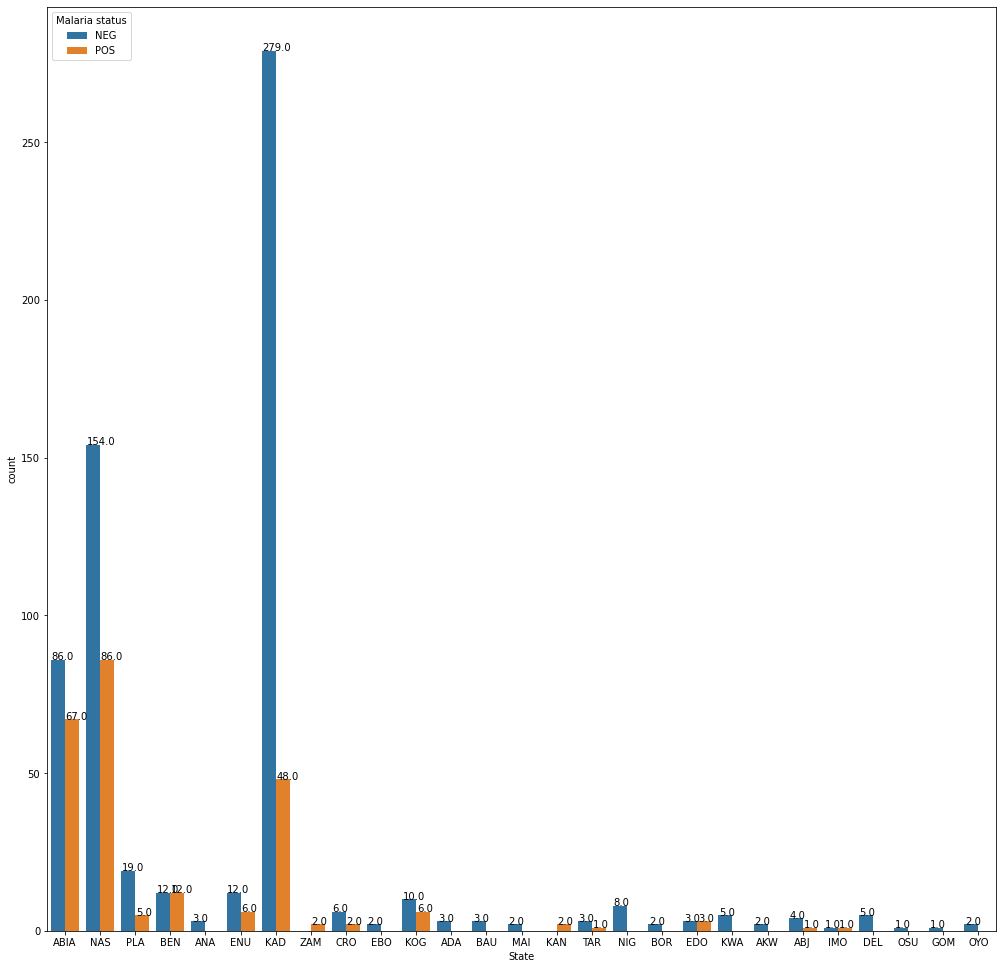

In [15]:
#Correlation between Malaria and the state
plt.figure(figsize=(17,17))
a=sns.countplot(x='State',hue=data.iloc[:,7],data=data)
for p in a.patches:
    a.annotate('{:}'.format(p.get_height()),
               (p.get_x()+0.02, p.get_height()+0.01))
plt.show()

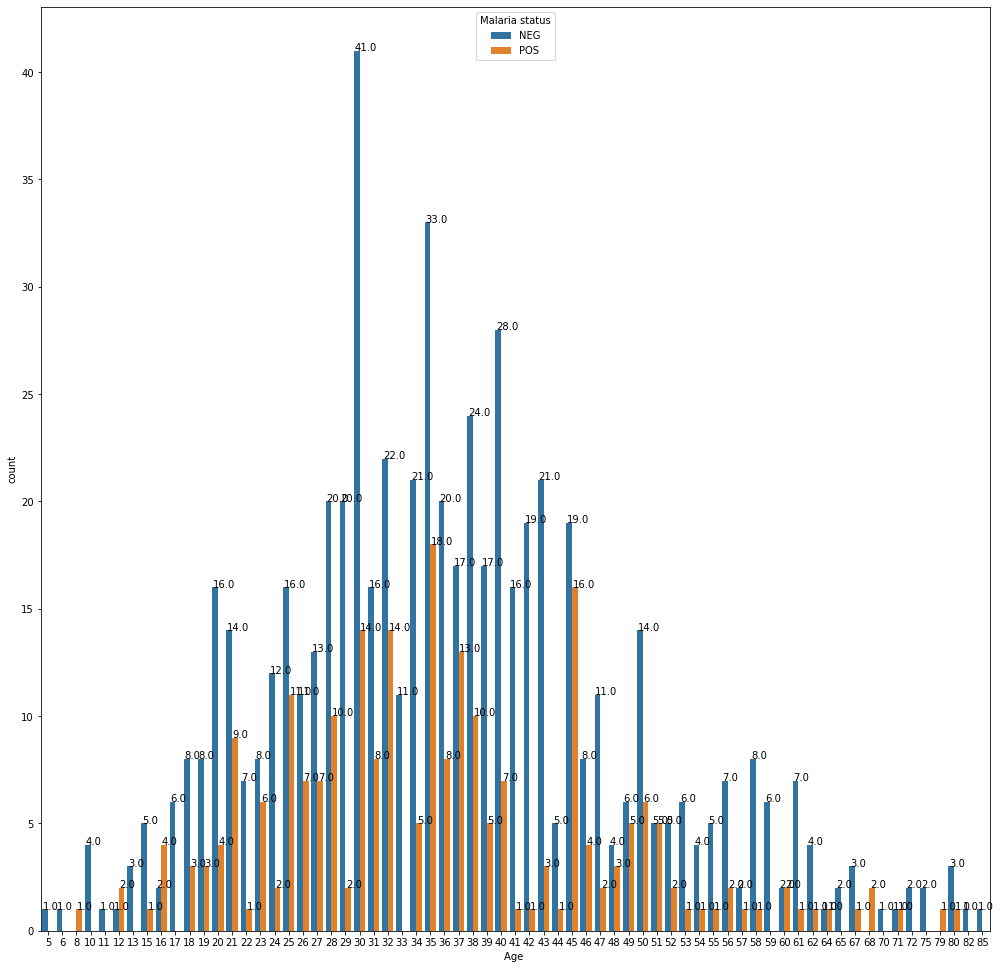

In [16]:
#Correlation between Malaria status and age
plt.figure(figsize=(17,17))
a=sns.countplot(x=data.iloc[:,1],hue=data.iloc[:,7],data=data)
for p in a.patches:
    a.annotate('{:}'.format(p.get_height()),
               (p.get_x()+0.05, p.get_height()+0.01))
plt.show()

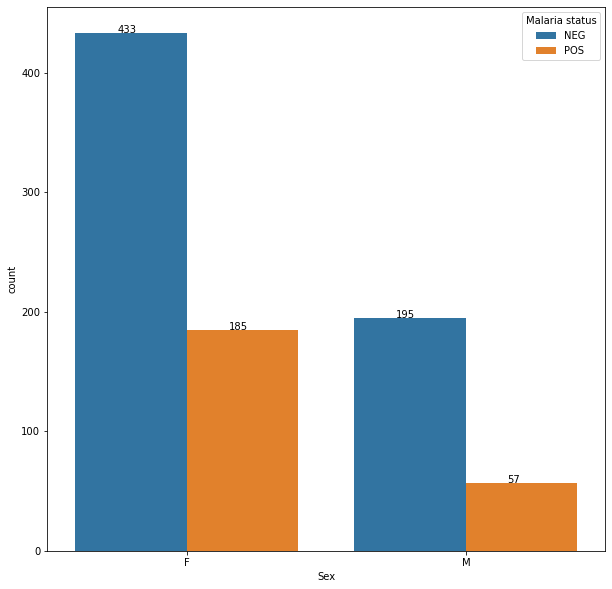

In [17]:
#Correlation between Malaria Status and the gender
plt.figure(figsize=(10,10))
a=sns.countplot(x='Sex',hue=data.iloc[:,7],data=data)
for p in a.patches:
    a.annotate('{:}'.format(p.get_height()),
               (p.get_x()+0.15, p.get_height()+0.01))
plt.show()

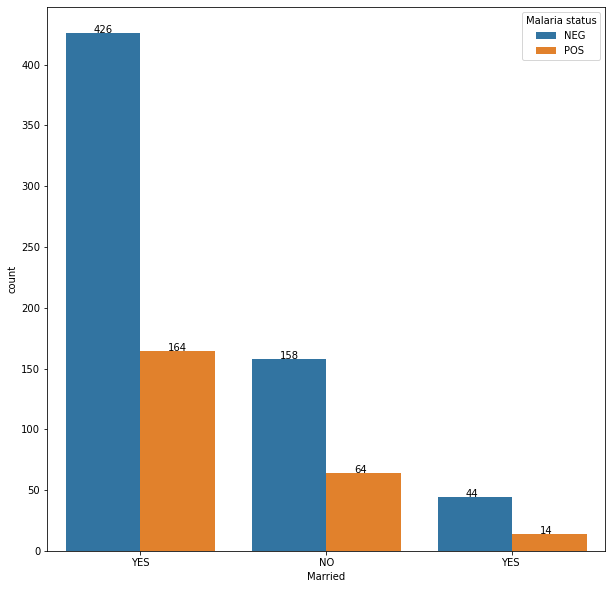

In [18]:
#Correlation between Malaria Status and Marriage 
plt.figure(figsize=(10,10))
a=sns.countplot(x='Married',hue=data.iloc[:,7],data=data)
for p in a.patches:
    a.annotate('{:}'.format(p.get_height()),
               (p.get_x()+0.15, p.get_height()+0.1))
plt.show() 

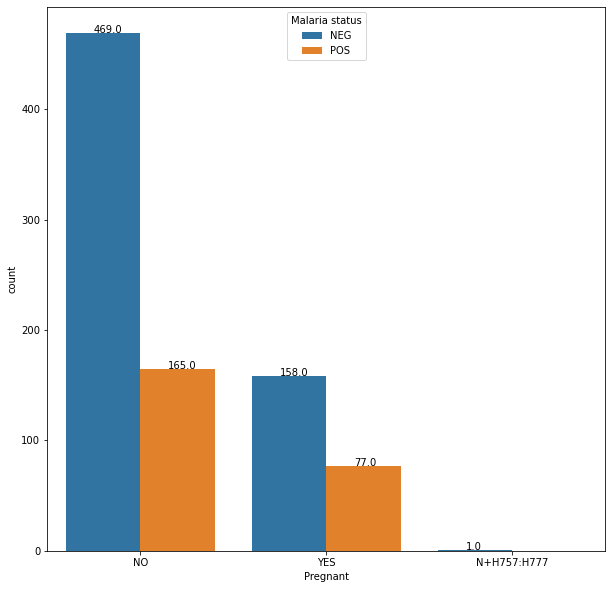

In [19]:
#Correlation between Malaria Status and the Pregnant ones
plt.figure(figsize=(10,10))
a=sns.countplot(x='Pregnant',hue=data.iloc[:,7],data=data)
for p in a.patches:
    a.annotate('{:}'.format(p.get_height()),
               (p.get_x()+0.15, p.get_height()+0.01))
plt.show()

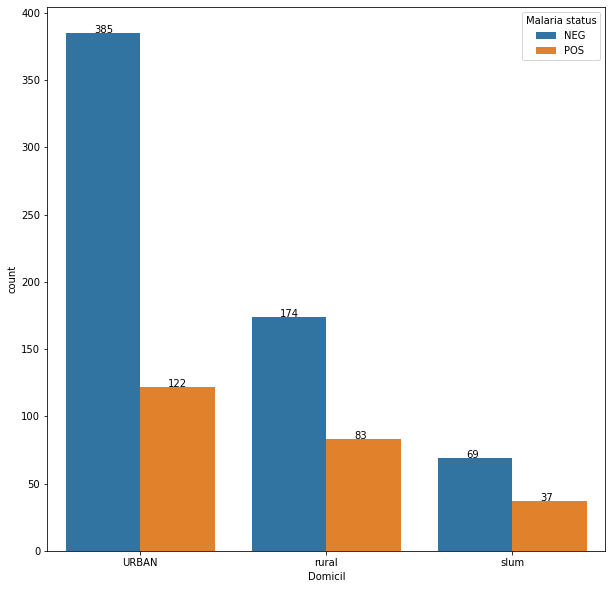

In [20]:
#Correlation between Malaria Status and the Domicil 
plt.figure(figsize=(10,10))
a=sns.countplot(x='Domicil',hue=data.iloc[:,7],data=data)
for p in a.patches:
    a.annotate('{:}'.format(p.get_height()),
               (p.get_x()+0.15, p.get_height()+0.1))
plt.show()

* Few number of people are having Malaria
* Those infected with this virus range from age 8 to 80 and mostly adults
* Few the states has this virus 
* Most of the people tested are married
* Female are most test
* Most of the female are tested postive and few are pregant
* All the Domicil are infected with this virus with the urban and rural areas having 
  the most population

# Correlation between CHIKV and other feature

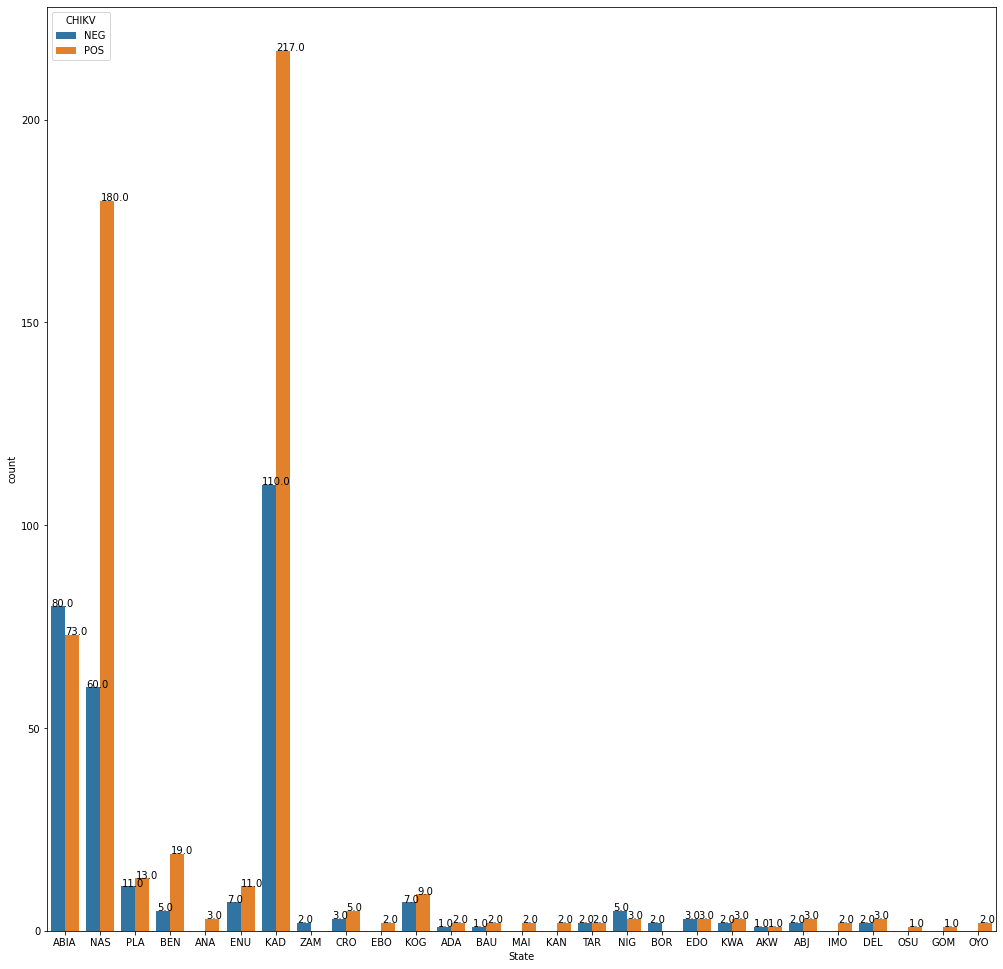

In [21]:
#Correlation between CHIKV and the state
plt.figure(figsize=(17,17))
a=sns.countplot(x='State',hue='CHIKV',data=data)
for p in a.patches:
    a.annotate('{:}'.format(p.get_height()),
               (p.get_x()+0.02, p.get_height()+0.01))
plt.show()

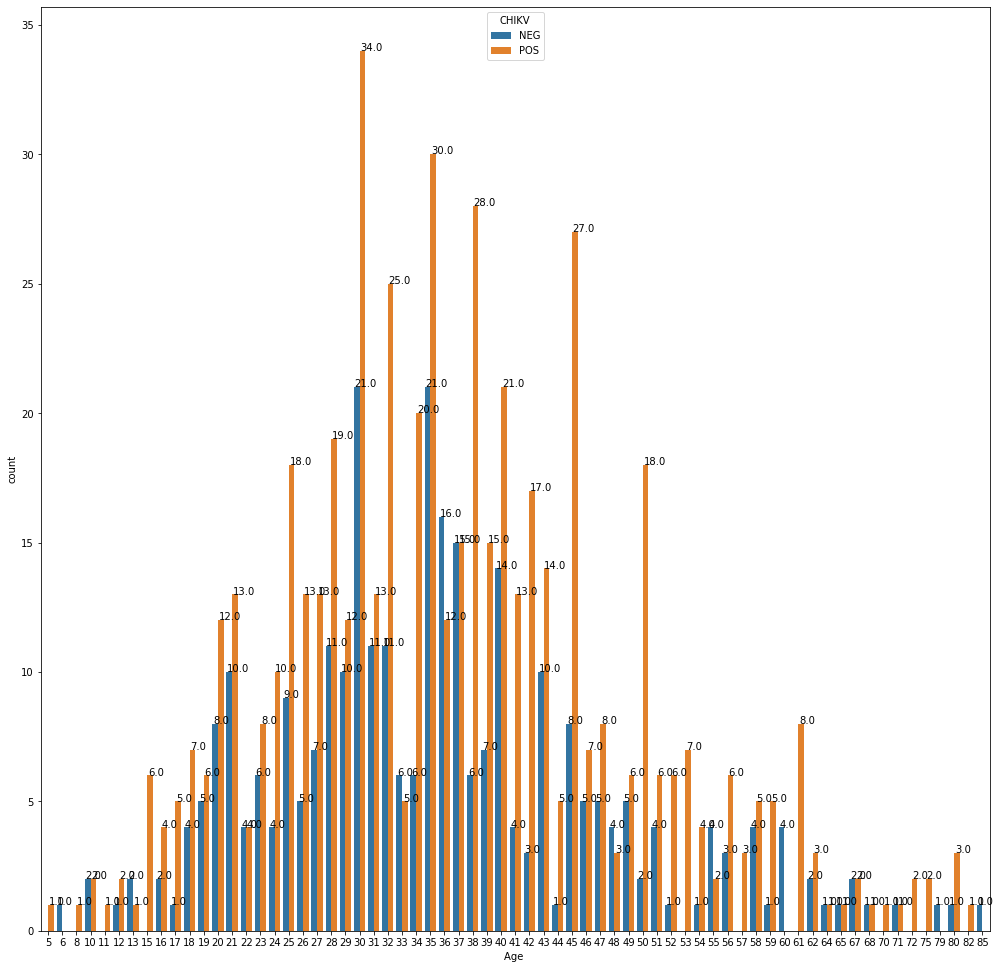

In [22]:
#Correlation between CHIKV and age
plt.figure(figsize=(17,17))
a=sns.countplot(x=data.iloc[:,1],hue='CHIKV',data=data)
for p in a.patches:
    a.annotate('{:}'.format(p.get_height()),
               (p.get_x()+0.05, p.get_height()+0.01))
plt.show()

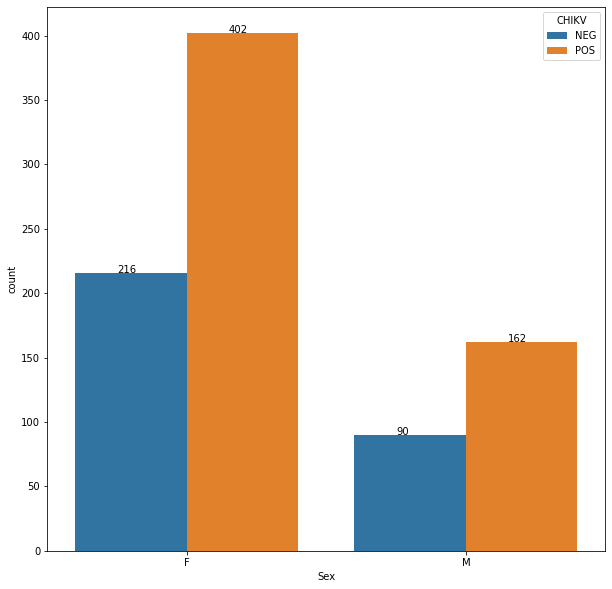

In [23]:
#Correlation between CHIKV and the gender
plt.figure(figsize=(10,10))
a=sns.countplot(x='Sex',hue='CHIKV',data=data)
for p in a.patches:
    a.annotate('{:}'.format(p.get_height()),
               (p.get_x()+0.15, p.get_height()+0.01))
plt.show()

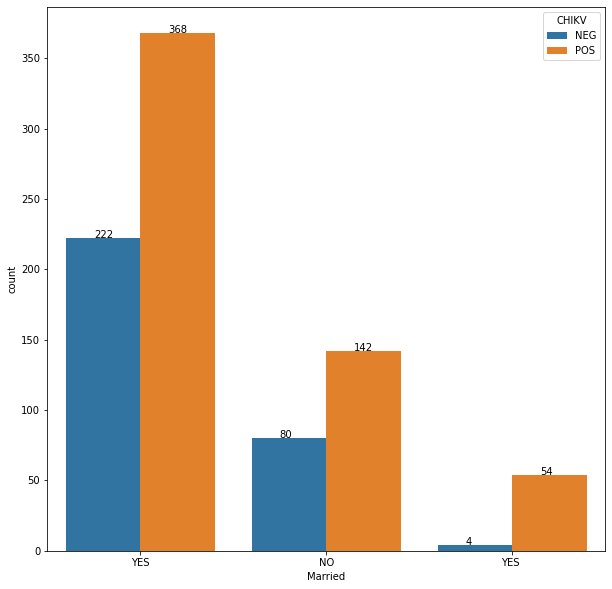

In [24]:
#Correlation between CHIKV and Marriage 
plt.figure(figsize=(10,10))
a=sns.countplot(x='Married',hue='CHIKV',data=data)
for p in a.patches:
    a.annotate('{:}'.format(p.get_height()),
               (p.get_x()+0.15, p.get_height()+0.1))
plt.show()

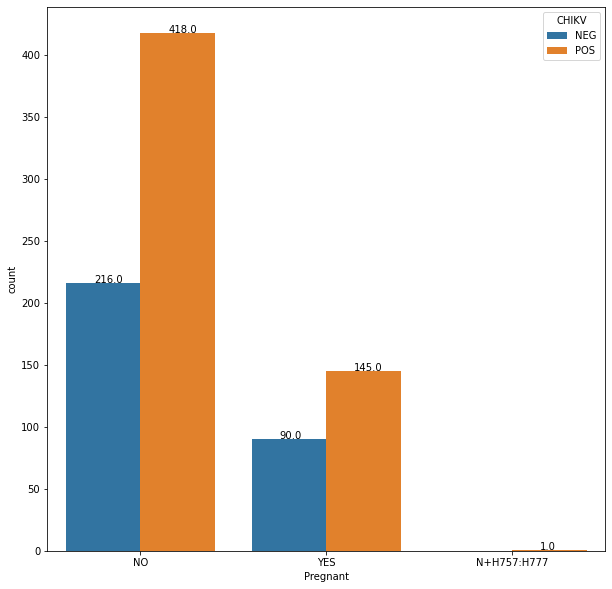

In [25]:
#Correlation between CHIKV and the Pregnant ones
plt.figure(figsize=(10,10))
a=sns.countplot(x='Pregnant',hue='CHIKV',data=data)
for p in a.patches:
    a.annotate('{:}'.format(p.get_height()),
               (p.get_x()+0.15, p.get_height()+0.01))
plt.show()

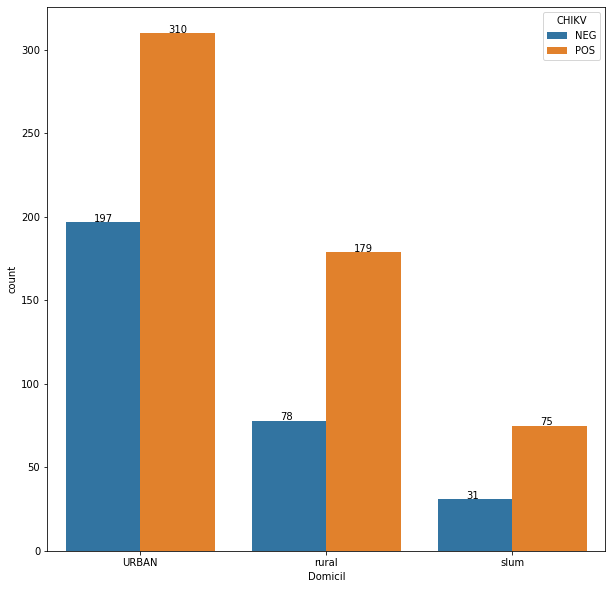

In [26]:
#Correlation between CHIKV and the Domicil 
plt.figure(figsize=(10,10))
a=sns.countplot(x='Domicil',hue='CHIKV',data=data)
for p in a.patches:
    a.annotate('{:}'.format(p.get_height()),
               (p.get_x()+0.15, p.get_height()+0.1))
plt.show()

* A large number of people are been infected by CHIKV
* Those infected with this virus range from age 5 to 80 and mostly adults
* Almost all the states has this virus 
* Female are most test
* Most of the people tested are married
* Most of the female are tested postive and few are pregant
* All the Domicil are infected with this virus

# Correlation between DENV and other feature

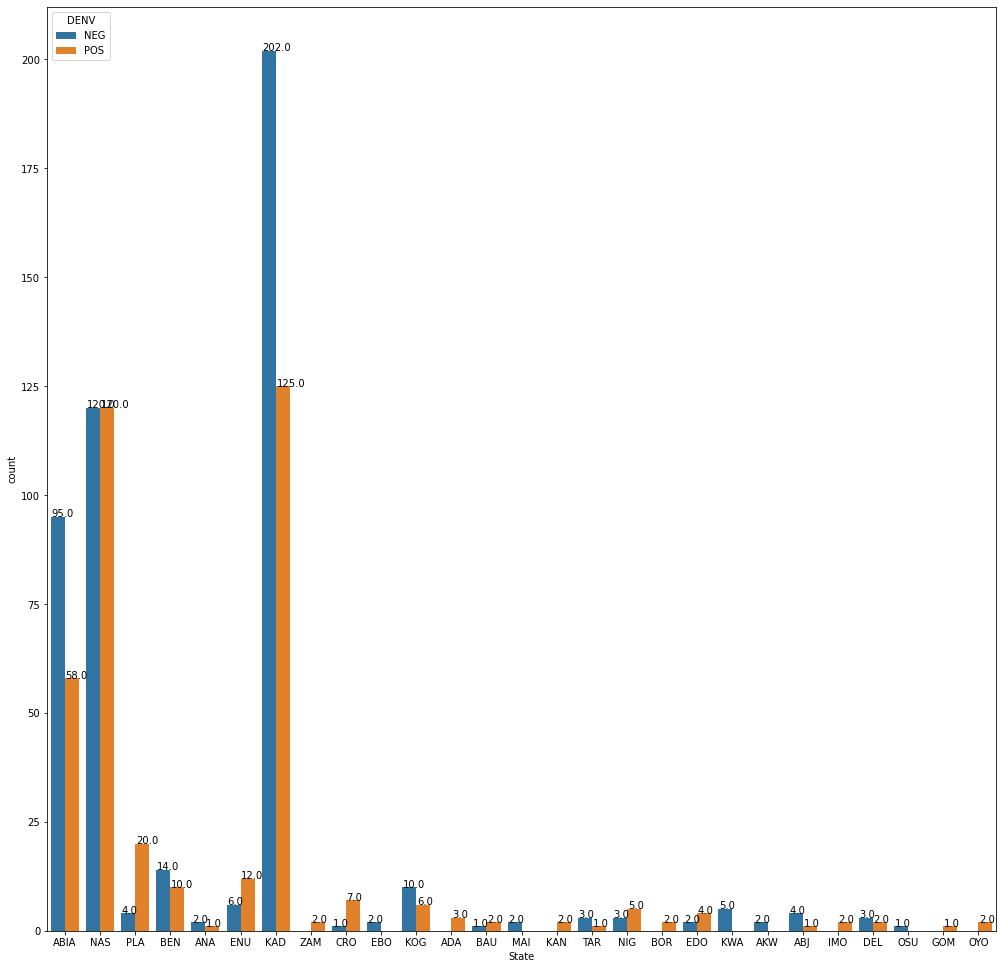

In [27]:
#Correlation between DENV and the state
plt.figure(figsize=(17,17))
a=sns.countplot(x='State',hue='DENV',data=data)
for p in a.patches:
    a.annotate('{:}'.format(p.get_height()),
               (p.get_x()+0.02, p.get_height()+0.01))
plt.show()

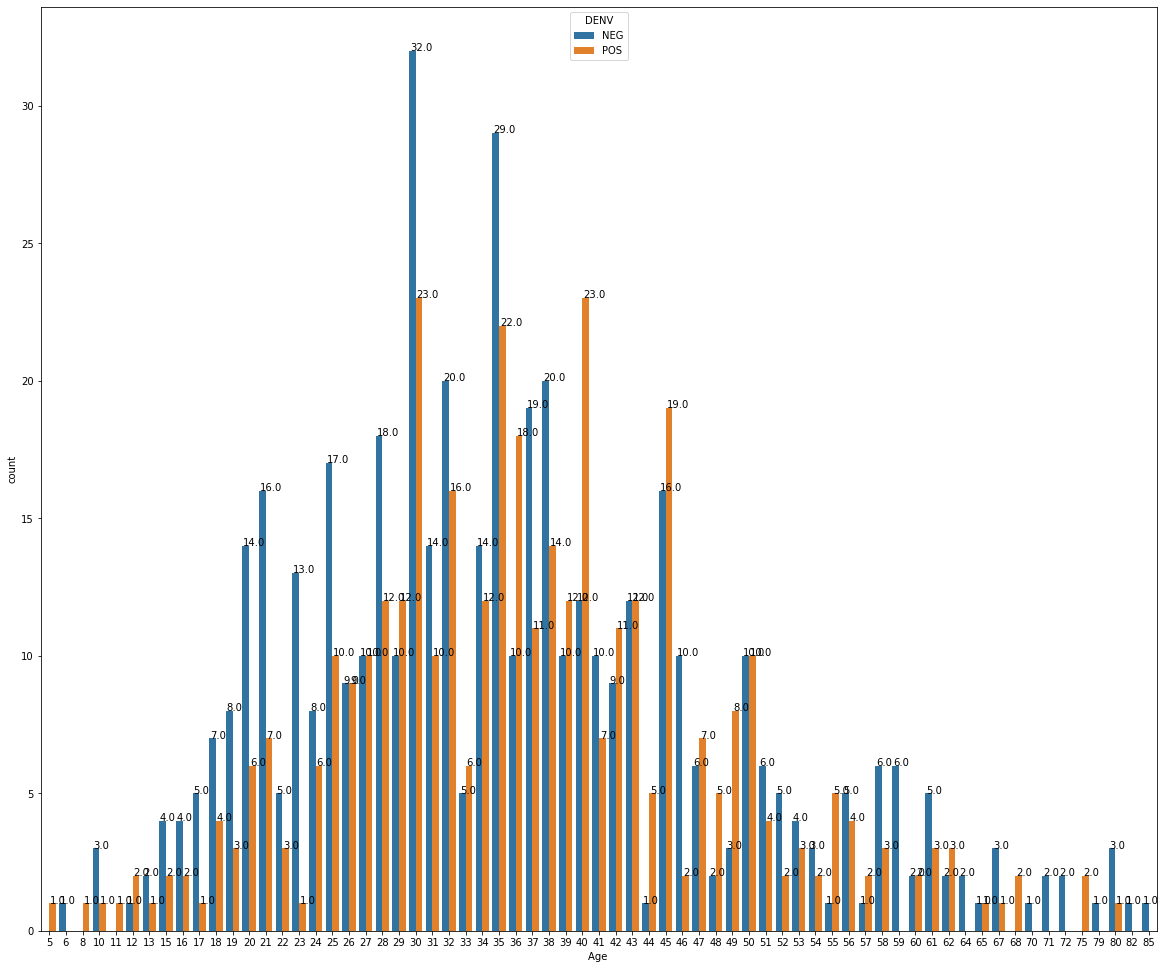

In [28]:
#Correlation between DENV and age
plt.figure(figsize=(20,17))
a=sns.countplot(x=data.iloc[:,1],hue='DENV',data=data)
for p in a.patches:
    a.annotate('{:}'.format(p.get_height()),
               (p.get_x()+0.05, p.get_height()+0.01))
plt.show()

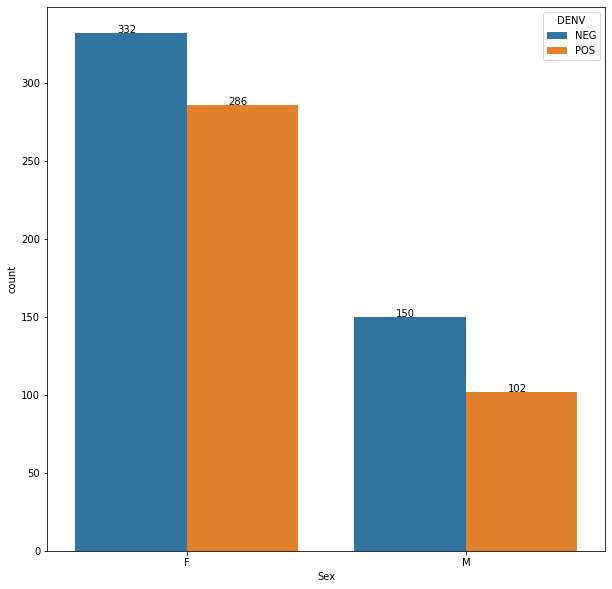

In [29]:
#Correlation between DENV and the gender
plt.figure(figsize=(10,10))
a=sns.countplot(x='Sex',hue='DENV',data=data)
for p in a.patches:
    a.annotate('{:}'.format(p.get_height()),
               (p.get_x()+0.15, p.get_height()+0.01))
plt.show()

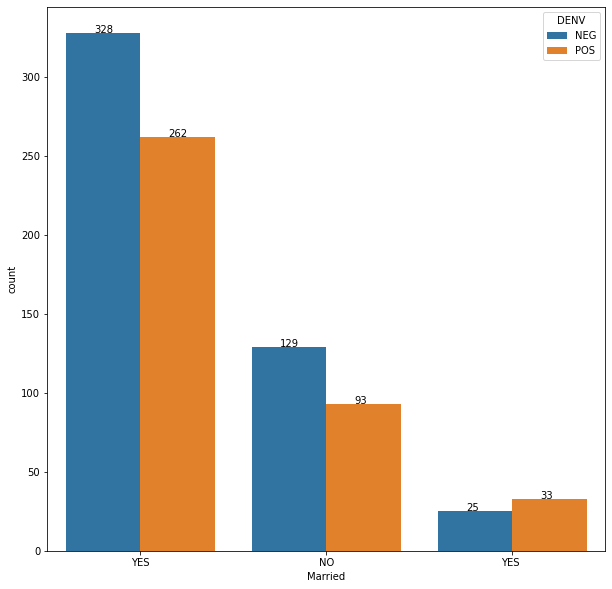

In [30]:
#Correlation between DENV and Marriage 
plt.figure(figsize=(10,10))
a=sns.countplot(x='Married',hue='DENV',data=data)
for p in a.patches:
    a.annotate('{:}'.format(p.get_height()),
               (p.get_x()+0.15, p.get_height()+0.1))
plt.show()

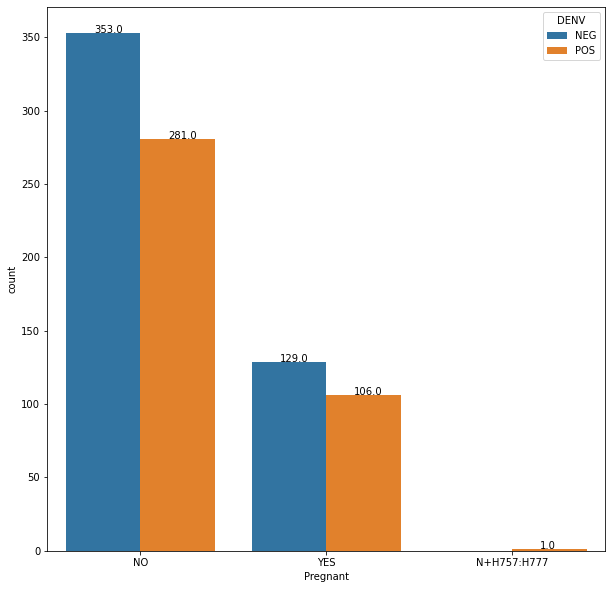

In [31]:
#Correlation between DENV and the Pregnant ones
plt.figure(figsize=(10,10))
a=sns.countplot(x='Pregnant',hue='DENV',data=data)
for p in a.patches:
    a.annotate('{:}'.format(p.get_height()),
               (p.get_x()+0.15, p.get_height()+0.01))
plt.show()

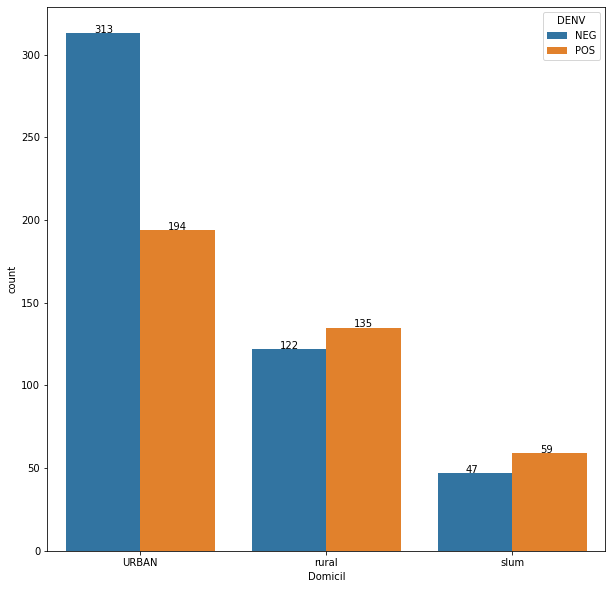

In [32]:
#Correlation between DENV and the Domicil 
plt.figure(figsize=(10,10))
a=sns.countplot(x='Domicil',hue='DENV',data=data)
for p in a.patches:
    a.annotate('{:}'.format(p.get_height()),
               (p.get_x()+0.15, p.get_height()+0.1))
plt.show()

* A large number of people are been infected by DENV
* Those infected with this virus range from age 5 to 80 and mostly adults  
* Almost all the states has this virus
* Female are most test
* Most of the people tested are married and most are tested positive
* Most of the female are tested postive and some are pregant
* All the Domicil are infected with this virus

# Correlation between ZIKV and other feature

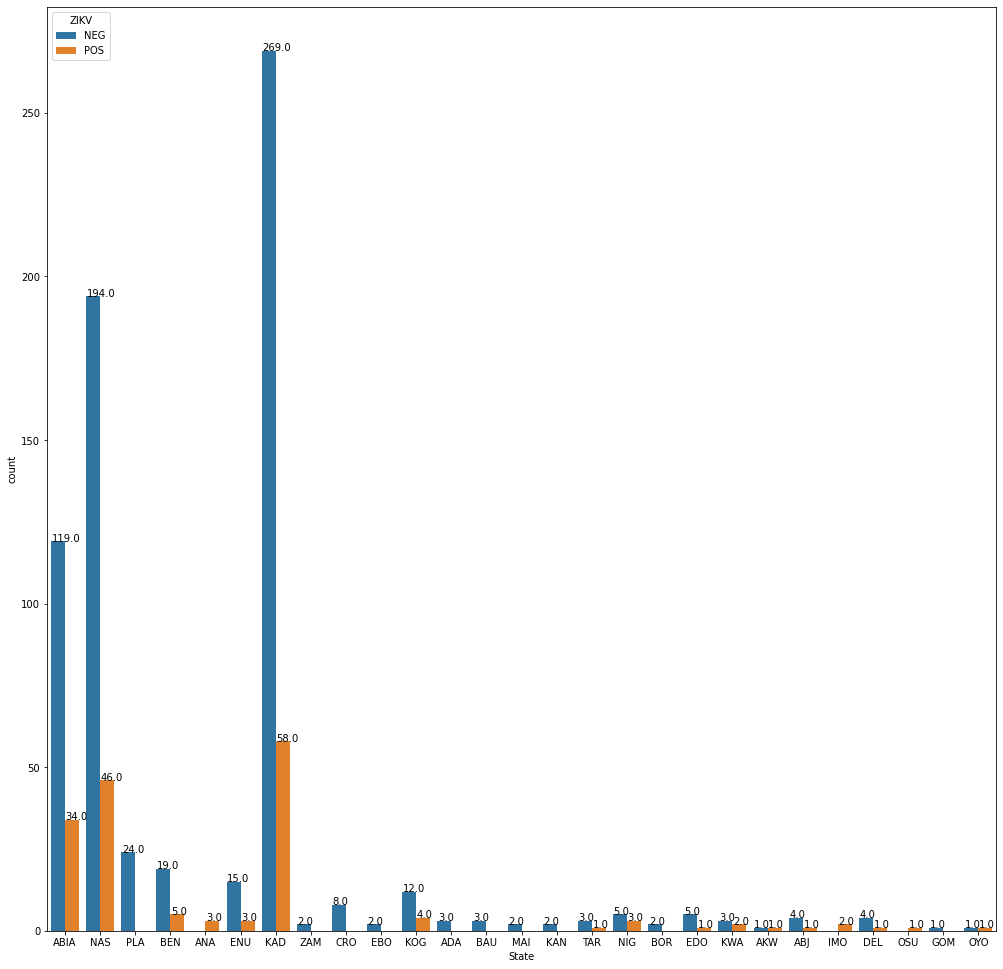

In [33]:
#Correlation between ZIKV and the State
plt.figure(figsize=(17,17))
a=sns.countplot(x='State',hue='ZIKV',data=data)
for p in a.patches:
    a.annotate('{:}'.format(p.get_height()),
               (p.get_x()+0.02, p.get_height()+0.01))
plt.show()

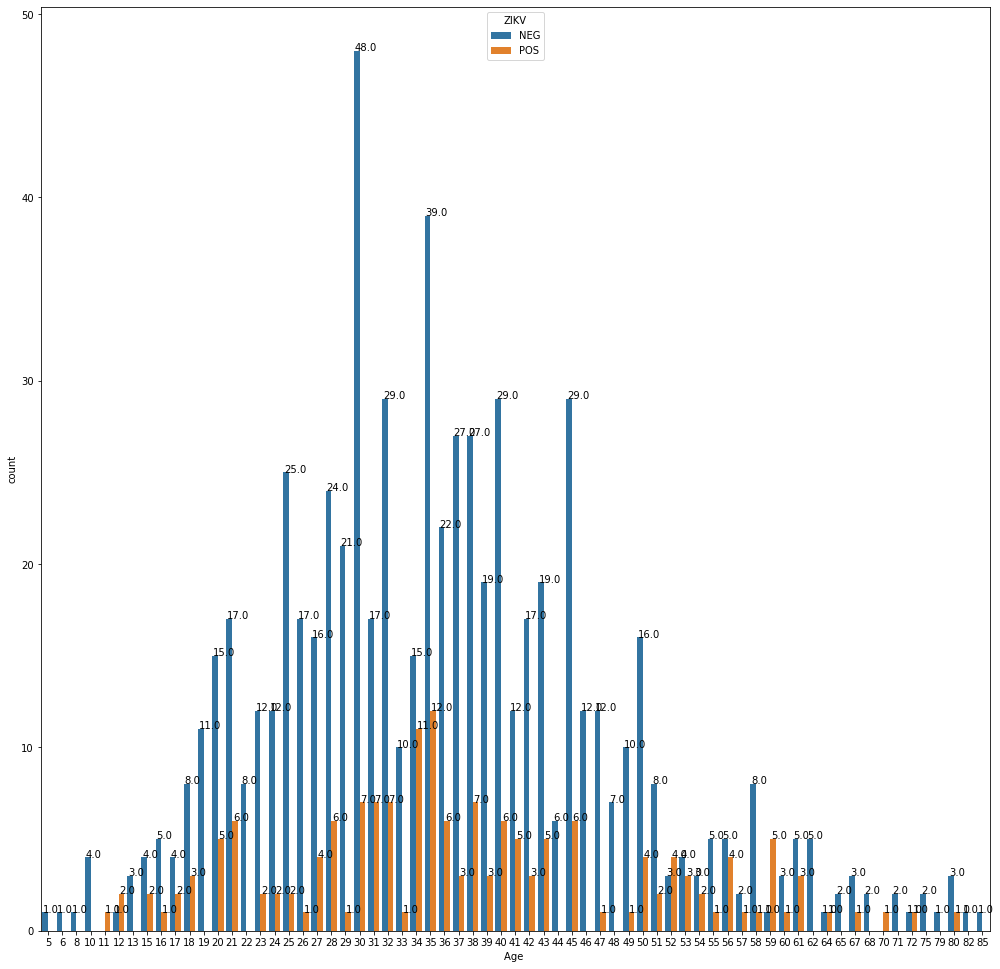

In [34]:
#Correlation between ZIKV and age
plt.figure(figsize=(17,17))
a=sns.countplot(x=data.iloc[:,1],hue='ZIKV',data=data)
for p in a.patches:
    a.annotate('{:}'.format(p.get_height()),
               (p.get_x()+0.05, p.get_height()+0.01))
plt.show()

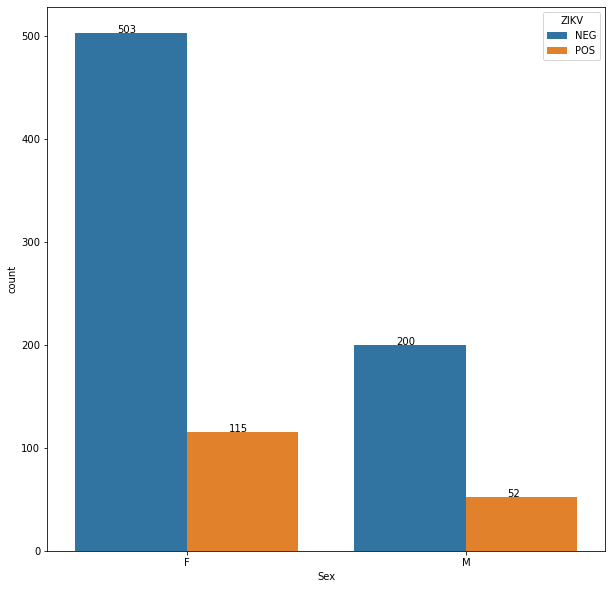

In [35]:
#Correlation between ZIKV and the gender
plt.figure(figsize=(10,10))
a=sns.countplot(x='Sex',hue='ZIKV',data=data)
for p in a.patches:
    a.annotate('{:}'.format(p.get_height()),
               (p.get_x()+0.15, p.get_height()+0.01))
plt.show()

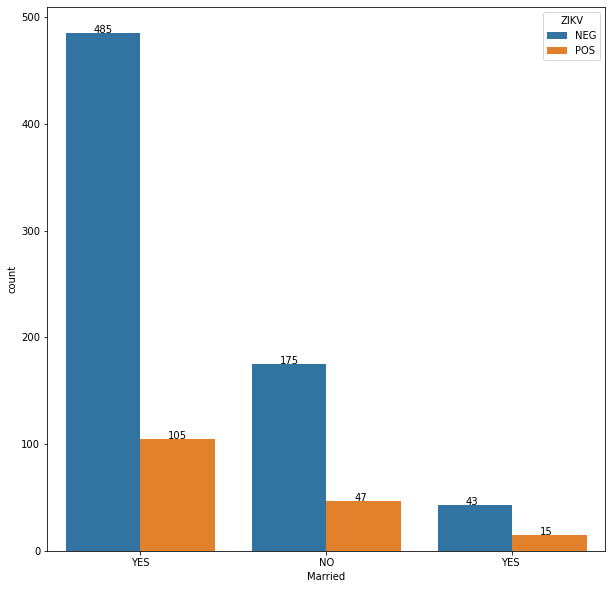

In [36]:
#Correlation between ZIKV and Marriage 
plt.figure(figsize=(10,10))
a=sns.countplot(x='Married',hue='ZIKV',data=data)
for p in a.patches:
    a.annotate('{:}'.format(p.get_height()),
               (p.get_x()+0.15, p.get_height()+0.1))
plt.show()

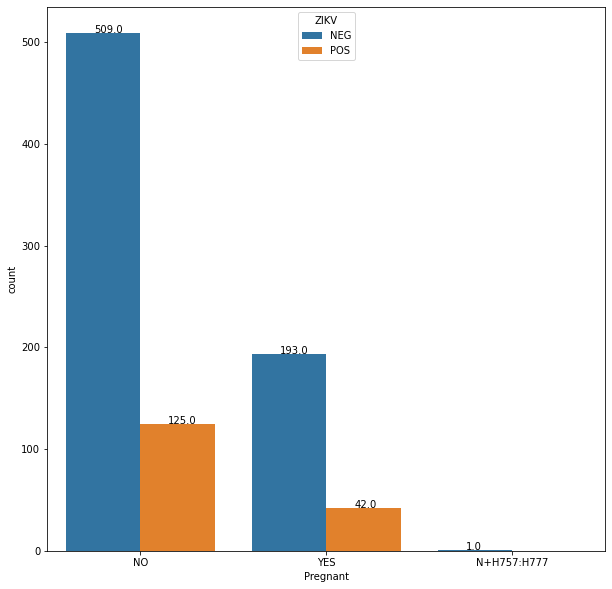

In [37]:
#Correlation between ZIKV and the Pregnant ones
plt.figure(figsize=(10,10))
a=sns.countplot(x='Pregnant',hue='ZIKV',data=data)
for p in a.patches:
    a.annotate('{:}'.format(p.get_height()),
               (p.get_x()+0.15, p.get_height()+0.01))
plt.show()

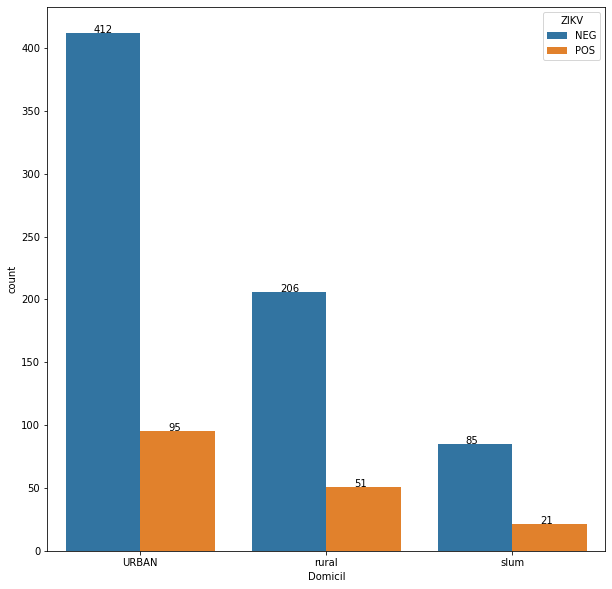

In [38]:
#Correlation between ZIKV and the Domicil 
plt.figure(figsize=(10,10))
a=sns.countplot(x='Domicil',hue='ZIKV',data=data)
for p in a.patches:
    a.annotate('{:}'.format(p.get_height()),
               (p.get_x()+0.15, p.get_height()+0.1))
plt.show()

* Quiet a number of people are been infected by ZIKV
* Those infected with this virus range from age 11 to 80 
* Female are most test
* Abia, nasarawa and Kaduna state have the most population of people with this virus 
* Most of the people tested are married and few are tested positive
* Most of the female are tested postive and some are pregant
* All the Domicil are infected with this virus with the urban and rural areas having 
  the most population

# Correlation between FLAVI and other feature

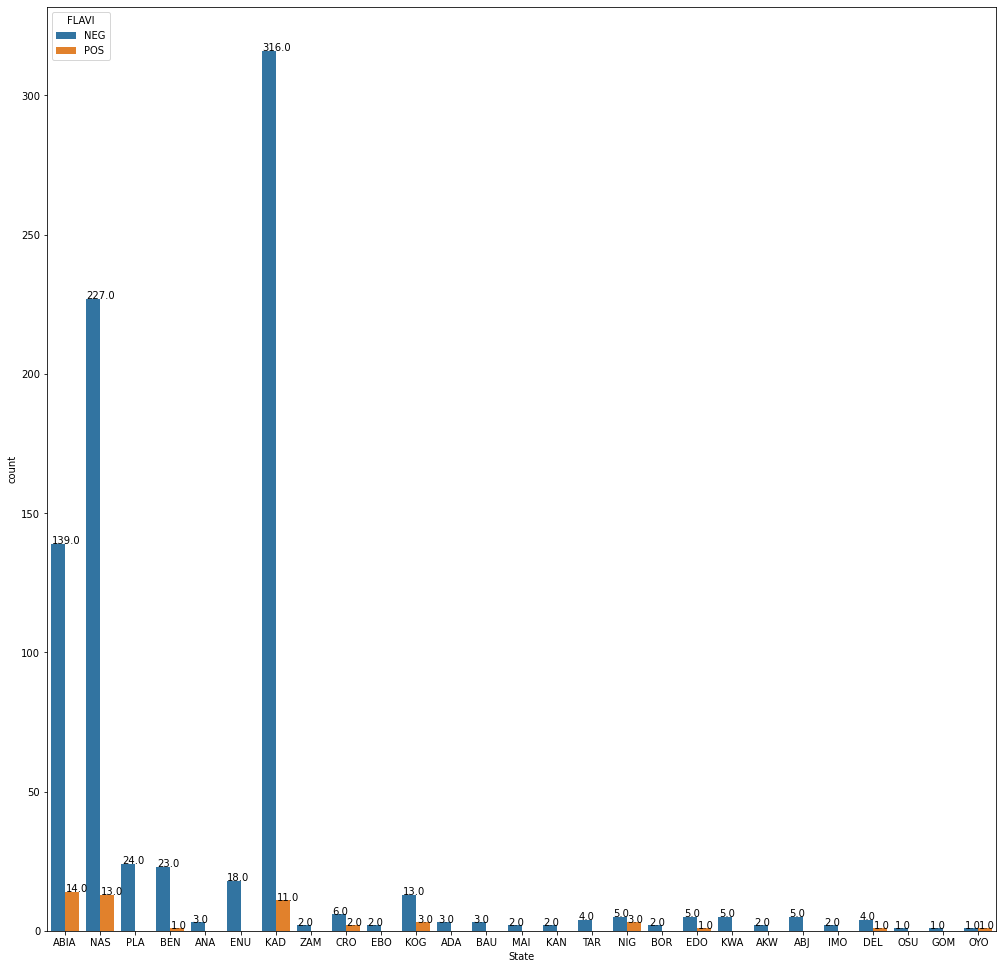

In [39]:
#Correlation between FLAVI and the state
plt.figure(figsize=(17,17))
a=sns.countplot(x='State',hue='FLAVI',data=data)
for p in a.patches:
    a.annotate('{:}'.format(p.get_height()),
               (p.get_x()+0.02, p.get_height()+0.01))
plt.show()

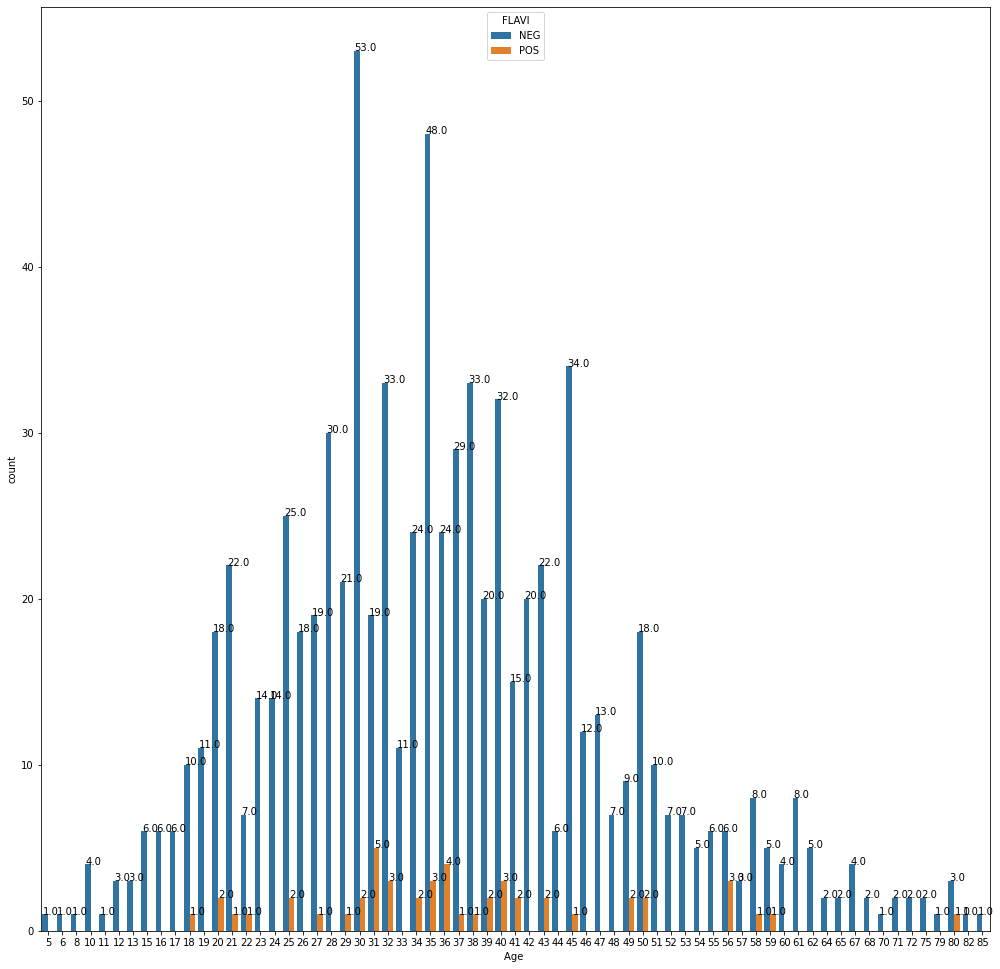

In [40]:
#Correlation between FLAVI and the Pregnant ones
plt.figure(figsize=(17,17))
a=sns.countplot(x=data.iloc[:,1],hue='FLAVI',data=data)
for p in a.patches:
    a.annotate('{:}'.format(p.get_height()),
               (p.get_x()+0.05, p.get_height()+0.01))
plt.show()

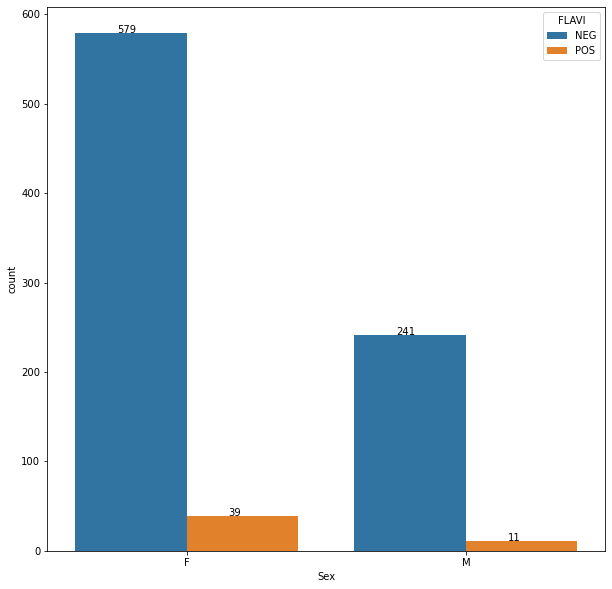

In [41]:
#Correlation between FLAVI and the gender
plt.figure(figsize=(10,10))
a=sns.countplot(x='Sex',hue='FLAVI',data=data)
for p in a.patches:
    a.annotate('{:}'.format(p.get_height()),
               (p.get_x()+0.15, p.get_height()+0.01))
plt.show()

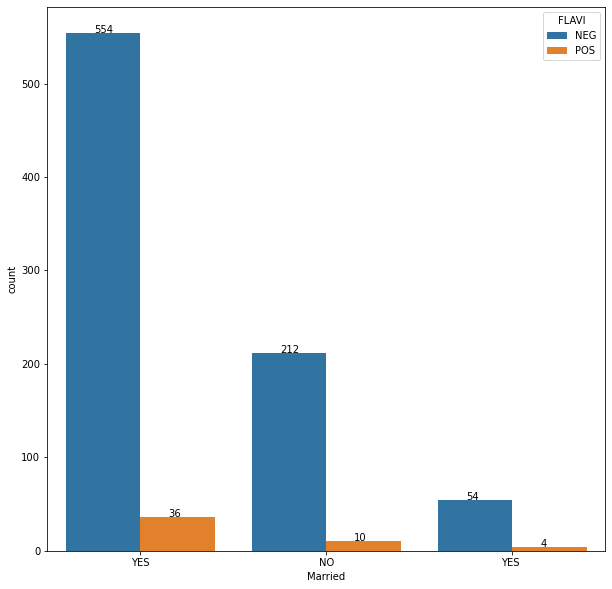

In [42]:
#Correlation between FLAVI and the Marriage 
plt.figure(figsize=(10,10))
a=sns.countplot(x='Married',hue='FLAVI',data=data)
for p in a.patches:
    a.annotate('{:}'.format(p.get_height()),
               (p.get_x()+0.15, p.get_height()+0.1))
plt.show()

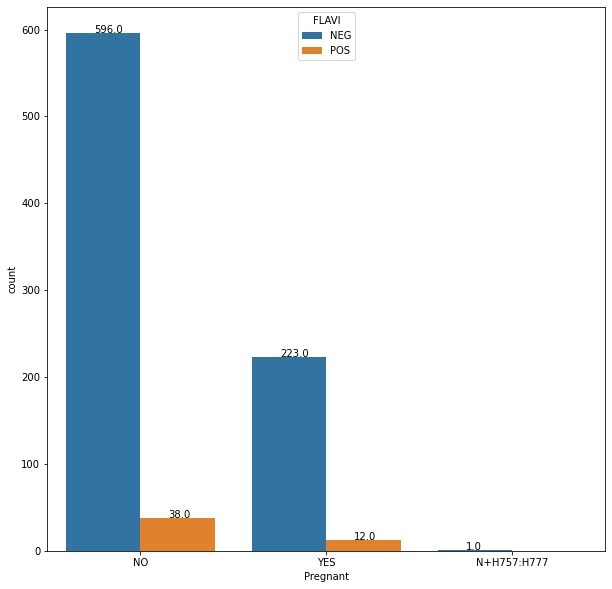

In [43]:
#Correlation between FLAVI and the Pregnant ones
plt.figure(figsize=(10,10))
a=sns.countplot(x='Pregnant',hue='FLAVI',data=data)
for p in a.patches:
    a.annotate('{:}'.format(p.get_height()),
               (p.get_x()+0.15, p.get_height()+0.01))
plt.show()

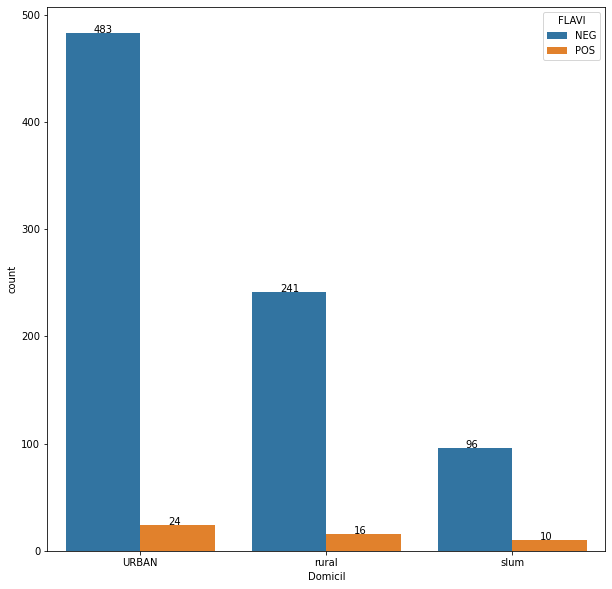

In [44]:
#Correlation between FLAVI and the Domicil 
plt.figure(figsize=(10,10))
a=sns.countplot(x='Domicil',hue='FLAVI',data=data)
for p in a.patches:
    a.annotate('{:}'.format(p.get_height()),
               (p.get_x()+0.15, p.get_height()+0.1))
plt.show()

* Quiet a number of people are not been infected by FLAVI
* Those infected with this virus range from age 18 to 60 
* Abia, nasarawa and Kaduna state have the most population of people with this virus
* Female are most test
* Most of the people tested are married
* Most of the female are tested postive and few are pregant
* All the Domicil are infected with this virus with the urban and rural areas having 
  the most population

Similarities between all virus 
* Most female are are infected
* Most adult are are infected
* Most married people are infected
* Most pregnant women are infected
* All the Domicil are infected